In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Energy_consumption.csv')

In [4]:
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [5]:
data.shape

(1000, 11)

In [6]:
data.isnull().sum()/len(data)*100

Timestamp            0.0
Temperature          0.0
Humidity             0.0
SquareFootage        0.0
Occupancy            0.0
HVACUsage            0.0
LightingUsage        0.0
RenewableEnergy      0.0
DayOfWeek            0.0
Holiday              0.0
EnergyConsumption    0.0
dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [8]:
for i in data.columns:
    print('****************',i,'*****************')
    print()
    print(set(data[i].tolist()))
    print()

**************** Timestamp *****************

{'2022-02-04 10:00:00', '2022-01-27 07:00:00', '2022-01-05 09:00:00', '2022-01-09 16:00:00', '2022-01-07 08:00:00', '2022-02-02 12:00:00', '2022-02-03 17:00:00', '2022-01-27 21:00:00', '2022-01-09 22:00:00', '2022-02-07 03:00:00', '2022-02-09 20:00:00', '2022-01-25 03:00:00', '2022-01-09 17:00:00', '2022-02-01 16:00:00', '2022-01-22 20:00:00', '2022-01-22 18:00:00', '2022-01-30 01:00:00', '2022-02-10 23:00:00', '2022-01-03 02:00:00', '2022-01-19 02:00:00', '2022-01-30 09:00:00', '2022-01-14 12:00:00', '2022-01-20 05:00:00', '2022-01-04 19:00:00', '2022-01-15 07:00:00', '2022-01-30 00:00:00', '2022-02-11 04:00:00', '2022-01-30 22:00:00', '2022-01-27 16:00:00', '2022-01-17 20:00:00', '2022-01-25 20:00:00', '2022-02-04 12:00:00', '2022-02-09 13:00:00', '2022-01-17 05:00:00', '2022-02-06 20:00:00', '2022-01-19 16:00:00', '2022-01-06 20:00:00', '2022-02-11 01:00:00', '2022-02-04 08:00:00', '2022-01-02 21:00:00', '2022-01-13 23:00:00', '2022-01-2

In [9]:
# Encoding of object variables required- 
# 1.Timestamp, 
# 2.HVACUsage,
# 3.LightingUsage, 
# 4.DayOfWeek,
# 5.Holiday

In [10]:
data['Timestamp'].nunique()

1000

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
def label_encoding(df):
    for cols in df.select_dtypes(include='object').columns:
        df[cols] = encoder.fit_transform(df[cols])
    return df.head()

In [13]:
label_encoding(data)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,1,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2,2,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
3,3,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
4,4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732


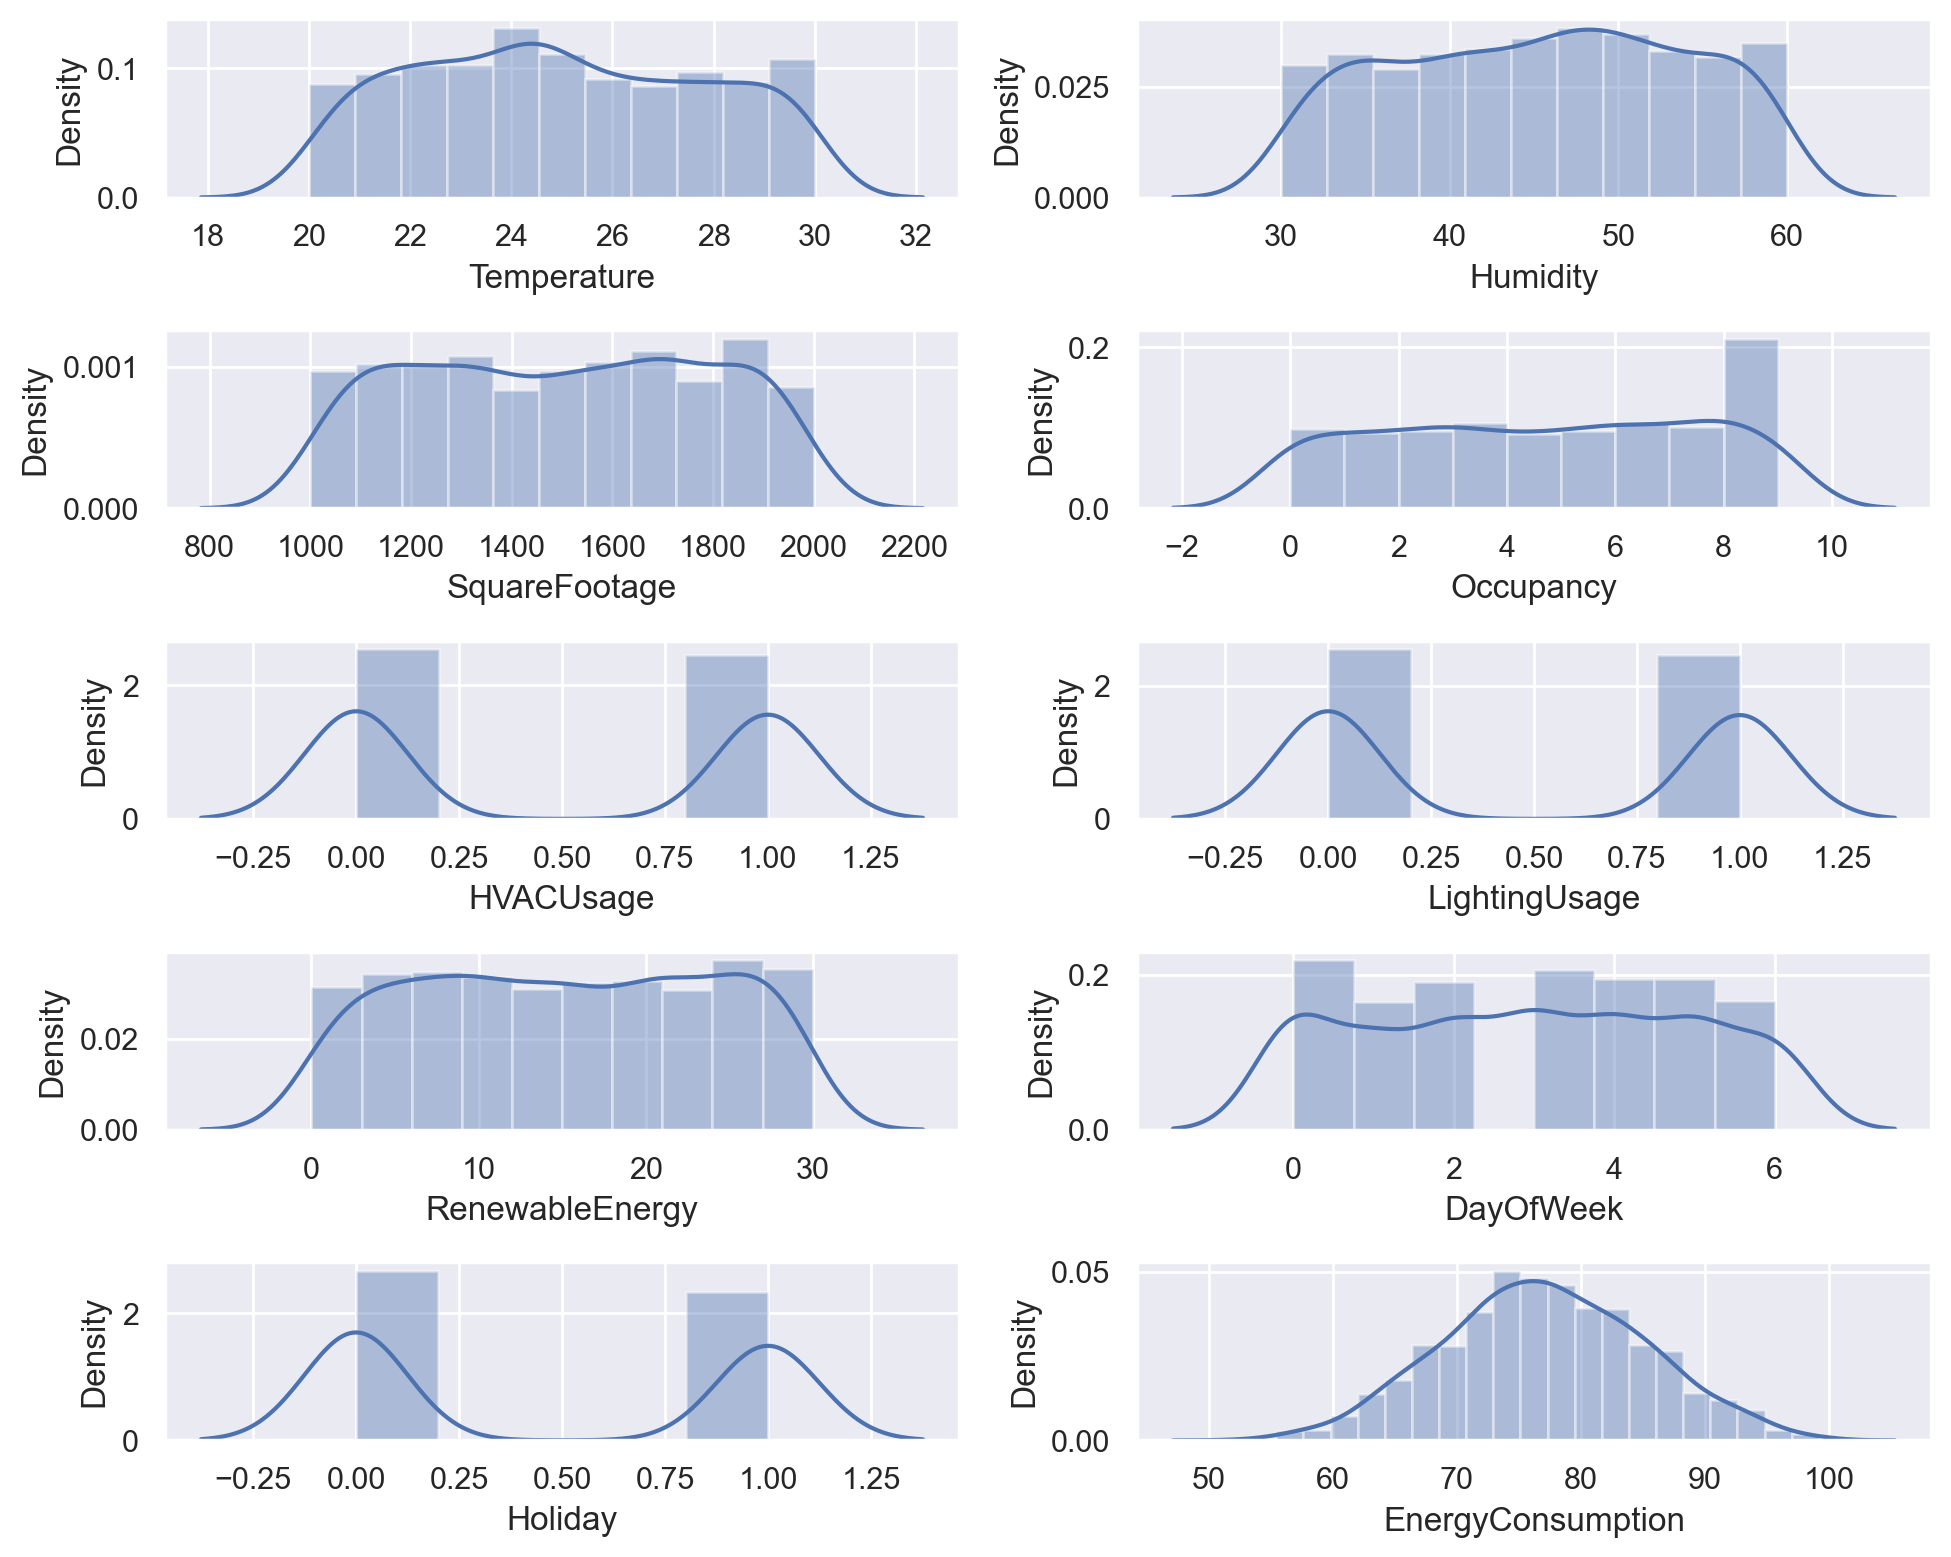

In [14]:
# check for outliers
plt.figure(figsize=(10,8), dpi = 200)
plt.subplot(5,2,1)
sns.distplot(data['Temperature'])

plt.subplot(5,2,2)
sns.distplot(data['Humidity'])

plt.subplot(5,2,3)
sns.distplot(data['SquareFootage'])

plt.subplot(5,2,4)
sns.distplot(data['Occupancy'])

plt.subplot(5,2,5)
sns.distplot(data['HVACUsage'])

plt.subplot(5,2,6)
sns.distplot(data['LightingUsage'])

plt.subplot(5,2,7)
sns.distplot(data['RenewableEnergy'])

plt.subplot(5,2,8)
sns.distplot(data['DayOfWeek'])

plt.subplot(5,2,9)
sns.distplot(data['Holiday'])

plt.subplot(5,2,10)
sns.distplot(data['EnergyConsumption'])

plt.tight_layout()
plt.show()

In [15]:
data.describe()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,24.982026,45.395412,1500.052488,4.581000,0.492000,0.491000,15.132813,2.929000,0.467000,77.055873
std,288.819436,2.836850,8.518905,288.418873,2.865598,0.500186,0.500169,8.745917,1.988948,0.499159,8.144112
min,0.000000,20.007565,30.015975,1000.512661,0.000000,0.000000,0.000000,0.006642,0.000000,0.000000,53.263278
25%,249.750000,22.645070,38.297722,1247.108548,2.000000,0.000000,0.000000,7.628385,1.000000,0.000000,71.544690
50%,499.500000,24.751637,45.972116,1507.967426,5.000000,0.000000,0.000000,15.072296,3.000000,0.000000,76.943696
75%,749.250000,27.418174,52.420066,1740.340165,7.000000,1.000000,1.000000,22.884064,5.000000,1.000000,82.921742
max,999.000000,29.998671,59.969085,1999.982252,9.000000,1.000000,1.000000,29.965327,6.000000,1.000000,99.201120


* From above describe function it can be inferred that outlier treatment is not required for any variable

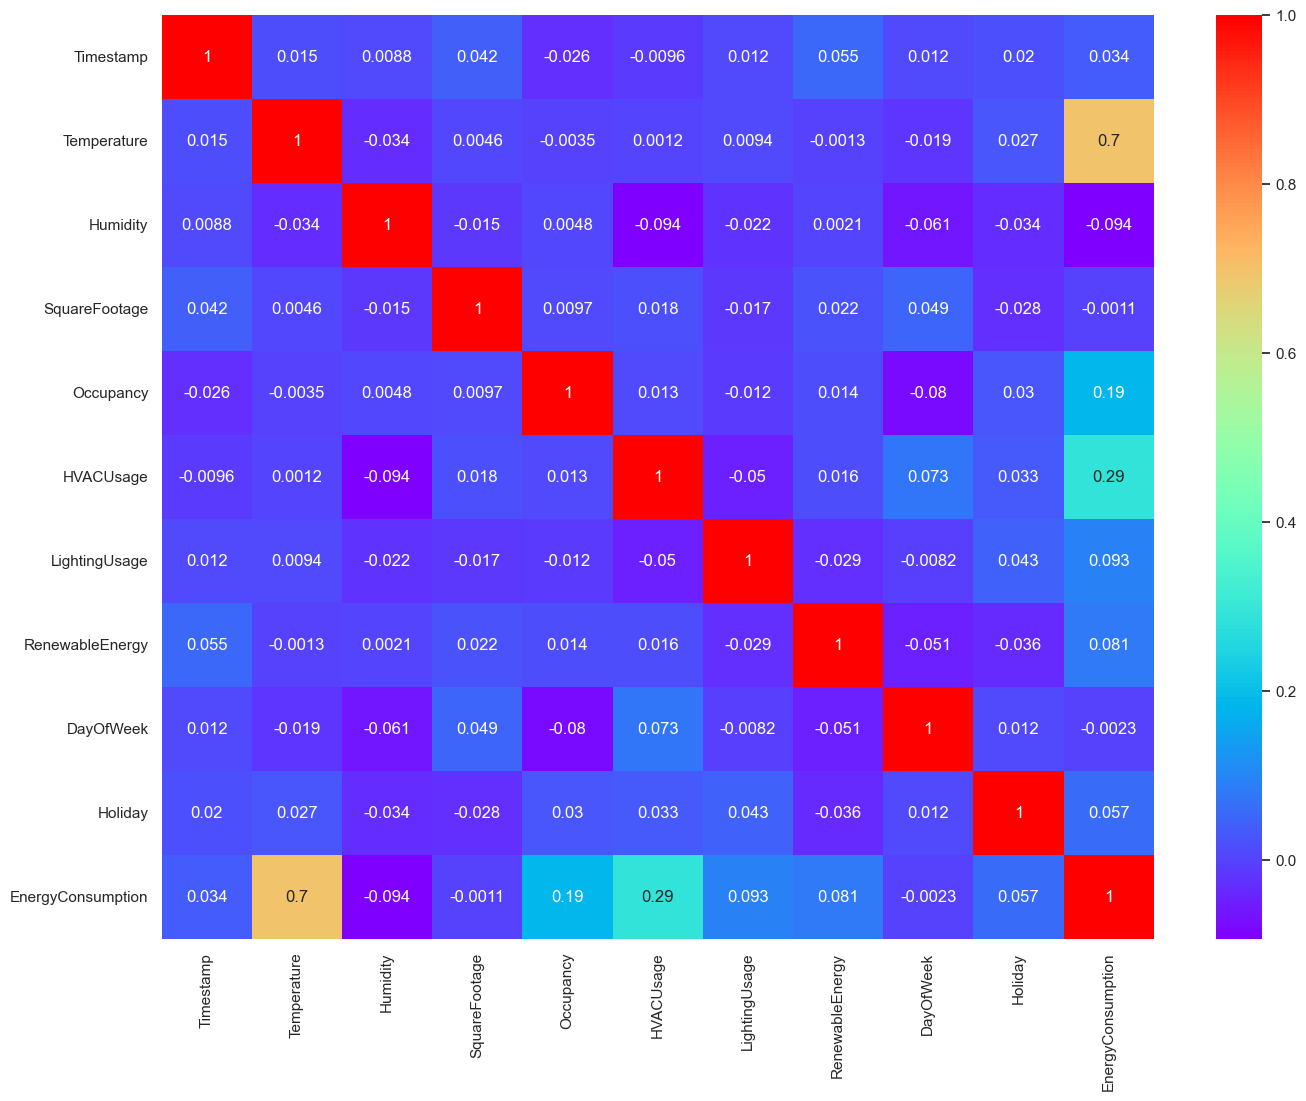

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, cmap='rainbow')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
data['SquareFootage'] = std_sc.fit_transform(data[['SquareFootage']])
data['Temperature'] = std_sc.fit_transform(data[['Temperature']])
data['Humidity'] = std_sc.fit_transform(data[['Humidity']])

In [18]:
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,0,0.055514,-0.230642,0.227705,5,1,0,2.774699,1,0,75.364373
1,1,0.969738,1.037096,-0.308690,1,1,1,21.831384,2,0,83.401855
2,2,1.312764,1.586942,0.886871,2,0,0,6.764672,3,0,78.270888
3,3,-1.728681,0.584431,-0.165593,1,0,1,8.623447,6,0,56.519850
4,4,-0.664684,0.705374,-1.408109,9,1,0,3.071969,0,0,70.811732


In [19]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=400)

In [21]:
print('x----->',x_train.shape, x_test.shape)
print('y----->',y_train.shape, y_test.shape)

x-----> (800, 10) (200, 10)
y-----> (800,) (200,)


In [22]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred_train_lrm = lrm.predict(x_train)
y_pred_test_lrm = lrm.predict(x_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
print('train_LinearReg_r2_score:', r2_score(y_train, y_pred_train_lrm))
print()
print('test_LinearReg_r2_score:', r2_score(y_test, y_pred_test_lrm))

train_LinearReg_r2_score: 0.6280207495560761

test_LinearReg_r2_score: 0.5932406743204817


In [26]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [27]:
ols = smf.OLS(endog=y_train, exog=x_train).fit()

In [28]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      EnergyConsumption   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              1240.
Date:                Tue, 23 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:40:22   Log-Likelihood:                         -3488.5
No. Observations:                 800   AIC:                                      6997.
Df Residuals:                     790   BIC:                                      7044.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Timestamp           0.0279      0.002     13.020      0.000       0.024       0.032
Temperature         6.0472      0.681      8.874      0.000       4.709       7.385
Humidity            0.0035      0.673      0.005      0.996      -1.317       1.324
SquareFootage      -0.4118      0.677     -0.608      0.543      -1.741       0.918
Occupancy           3.4727      0.211     16.438      0.000       3.058       3.887
HVACUsage          12.5497      1.329      9.444      0.000       9.941      15.158
LightingUsage      11.2876      1.306      8.640      0.000       8.723      13.852
RenewableEnergy     1.0500      0.068     15.373      0.000       0.916       1.184
DayOfWeek           3.8463      0.314     12.237      0.000       3.229       4.463
Holiday             8.6980      1.327      6.557      0.000       6.094      11.302
==============================================================================
Omnibus:                        4.331   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.461
Skew:                           0.044   Prob(JB):                        0.177
Kurtosis:                       2.690   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
y_pred_train_ols = ols.predict(exog=x_train)
y_pred_test_ols = ols.predict(exog=x_test)

In [30]:
print(r2_score(y_train, y_pred_train_ols))
print()
print(r2_score(y_test, y_pred_test_ols))

-4.562003366562998

-3.8348184957826534


* Variables- SquareFootage, DayOfWeek, Holiday have p-values 0.583, 0.070, 0.235 ,respectively which are greater than significance level 0.05
* We can conclude here that these features are insignificant for predicting Energy Consumption 

### Check for assumptions for Regresssion Dataset

### 1. Linearity check

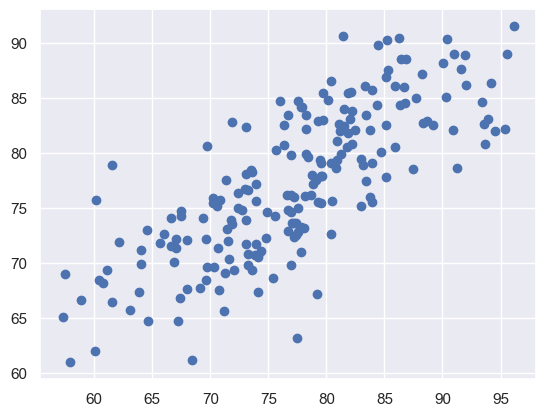

In [31]:
plt.scatter(y_test, y_pred_test_lrm)
plt.show()

### 2. Normality of Residuals

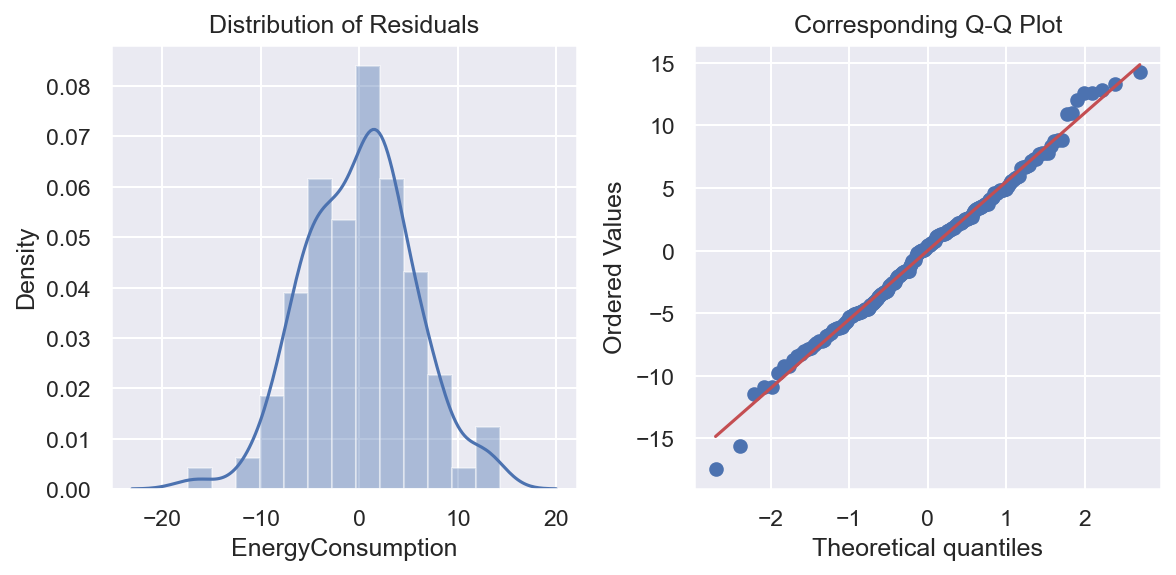

In [32]:
residual = y_test - y_pred_test_lrm

plt.figure(figsize=(8,4), dpi=150)
plt.subplot(1,2,1)
sns.distplot(residual)
plt.title('Distribution of Residuals')

import scipy as sp
ax = plt.subplot(1,2,2)
sp.stats.probplot(residual, plot=ax, fit=True)
plt.title('Corresponding Q-Q Plot')

plt.tight_layout()
plt.show()

### 3. Multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['Feature'] = x.columns
VIF['variance_inflation_factor'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
VIF

,Feature,variance_inflation_factor
0,Timestamp,3.287707
1,Temperature,1.002609
2,Humidity,1.012142
3,SquareFootage,1.004230
4,Occupancy,2.868738
5,HVACUsage,1.901546
6,LightingUsage,1.828037
7,RenewableEnergy,3.201351
8,DayOfWeek,2.661030
9,Holiday,1.805719


### 4. Homoscadisticity

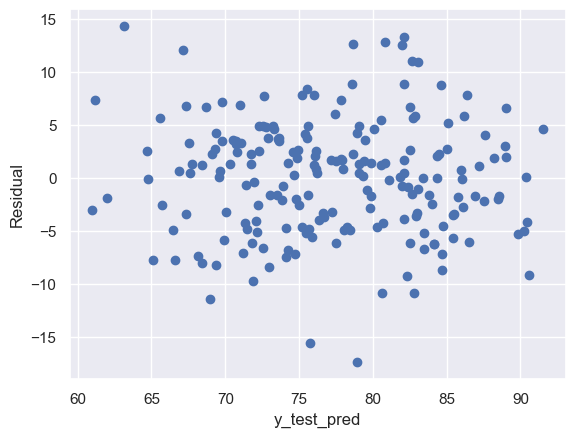

In [34]:
plt.scatter(x=y_pred_test_lrm, y=residual)
plt.xlabel('y_test_pred')
plt.ylabel('Residual')
plt.show()

### 5. Auto-Correaltion

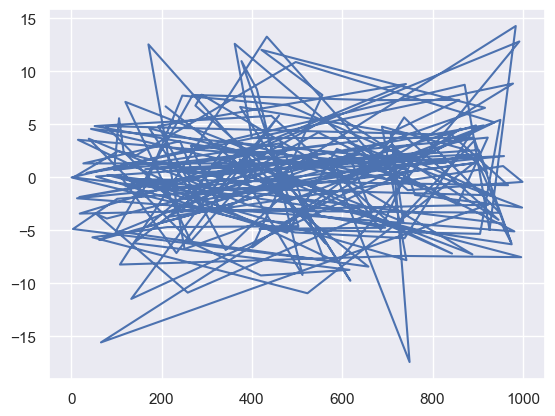

In [35]:
plt.plot(residual)
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfm = RandomForestRegressor()
rfm.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
y_pred_train_rfm = rfm.predict(x_train)
y_pred_test_rfm = rfm.predict(x_test)

In [38]:
print('train_RandomForest_r2_score:', r2_score(y_train, y_pred_train_rfm))
print()
print('test_RandomForest_r2_score:', r2_score(y_test, y_pred_test_rfm))

train_RandomForest_r2_score: 0.9384197586045233

test_RandomForest_r2_score: 0.5474074518859254


In [39]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(x_train, y_train)

AdaBoostRegressor()

In [40]:
y_pred_train_abr = abr.predict(x_train)
y_pred_test_abr = abr.predict(x_test)

In [41]:
print('train_AdaBoost_r2_score:', r2_score(y_train, y_pred_train_abr))
print()
print('test_AdaBoost_r2_score:', r2_score(y_test, y_pred_test_abr))

train_AdaBoost_r2_score: 0.6312499266415236

test_AdaBoost_r2_score: 0.5474645983201081


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [43]:
y_pred_train_gbr = gbr.predict(x_train)
y_pred_test_gbr = gbr.predict(x_test)

In [44]:
print('train_GradientBoost_r2_score:', r2_score(y_train, y_pred_train_gbr))
print()
print('test_GradientBoost_r2_score:', r2_score(y_test, y_pred_test_gbr))

train_GradientBoost_r2_score: 0.7834987895688403

test_GradientBoost_r2_score: 0.5948535566993489


In [45]:
from sklearn.ensemble import BaggingRegressor
bg = BaggingRegressor()
bg.fit(x_train, y_train)

BaggingRegressor()

In [46]:
y_pred_train_bg = bg.predict(x_train)
y_pred_test_bg = bg.predict(x_test)

In [47]:
print('train_Bagging_r2_score:', r2_score(y_train, y_pred_train_bg))
print()
print('test_Bagging_r2_score:', r2_score(y_test, y_pred_test_bg))

train_Bagging_r2_score: 0.9180904011474273

test_Bagging_r2_score: 0.4979920155888531


In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
Linear_Regressor_accuracy = cross_val_score(lrm, x_train, y_train, cv=10)
print(Linear_Regressor_accuracy.mean())

0.5999541704672797


In [50]:
Random_Forest_accuracy = cross_val_score(rfm, x_train, y_train, cv=10)
print(Random_Forest_accuracy.mean())

0.532990179203438


In [51]:
Ada_Boost_accuracy = cross_val_score(abr, x_train, y_train, cv=10)
print(Ada_Boost_accuracy.mean())

0.5387723502163368


In [52]:
Gradient_Boost_accuracy = cross_val_score(gbr, x_train, y_train, cv=10)
print(Gradient_Boost_accuracy.mean())

0.5386259643094747


In [53]:
Bagging_accuracy = cross_val_score(bg, x_train, y_train, cv=10)
print(Bagging_accuracy.mean())

0.47430429975589783
